In [55]:
import pandas as pd
from glob import glob

In [56]:
all_excel_files = glob("../results/gc/predictors*.xlsx")

# read all Excel files at once
df = pd.concat(pd.read_excel(excel_file) for excel_file in all_excel_files)

In [57]:
df['type'] = df['model'].apply(lambda x: x.split('_')[0])

In [58]:
metrics = ['type', 'roc_auc', 'f1', 'precision', 'recall', 'accuracy']

Obtener los mejores 10 algoritmos

In [94]:
best_types = df[df['roc_auc'].notnull()].sort_values(['roc_auc', 'accuracy'], ascending=False).groupby('type').head(1).head(10)['type'].tolist()

In [100]:
df[df["type"].isin(best_types)]

,model,score_test,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,roc_auc,average_precision,precision,...,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants,type
0,LightGBM_r161_BAG_L1_FULL,0.893333,0.875,0.816667,0.736842,0.827437,0.875,0.893333,0.888134,0.777778,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'learning_rate': 0.010464516487486093, 'extra...",{'num_boost_round': 534},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
1,LightGBM_r121_BAG_L1_FULL,0.886667,0.875,0.816667,0.736842,0.827437,0.875,0.886667,0.874959,0.777778,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'learning_rate': 0.010305352949119608, 'extra...",{'num_boost_round': 500},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
2,LightGBM_BAG_L1_FULL,0.883333,0.875,0.850000,0.761905,0.838579,0.875,0.883333,0.854530,0.727273,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'learning_rate': 0.05, 'num_boost_round': 114}",{'num_boost_round': 114},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
3,LightGBM_r131_BAG_L1_FULL,0.883333,0.900,0.866667,0.800000,0.866667,0.900,0.883333,0.851626,0.800000,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'learning_rate': 0.012144796373999013, 'extra...",{'num_boost_round': 461},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
5,LightGBM_r15_BAG_L1_FULL,0.873333,0.900,0.866667,0.800000,0.866667,0.900,0.873333,0.827149,0.800000,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'learning_rate': 0.018603888565740096, 'extra...",{'num_boost_round': 275},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],LightGBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,NeuralNetFastAI_r187_BAG_L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'layers': [200, 100, 50], 'emb_drop': 0.50749...","{'epochs': 42, 'best_epoch': 6}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],NeuralNetFastAI
217,NeuralNetFastAI_r160_BAG_L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'layers': [400, 200, 100], 'emb_drop': 0.3171...","{'epochs': 20, 'best_epoch': 3}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],NeuralNetFastAI
218,NeuralNetFastAI_r103_BAG_L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'layers': [400, 200], 'emb_drop': 0.150870168...","{'epochs': 46, 'best_epoch': 3}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],NeuralNetFastAI
219,NeuralNetFastAI_r88_BAG_L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'layers': [400], 'emb_drop': 0.43293618165892...","{'epochs': 50, 'best_epoch': 0}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],NeuralNetFastAI


In [107]:
top_df = (
    df[df["type"].isin(best_types)]
    .dropna(subset=["roc_auc"])  # Eliminar valores nulos en roc_auc
    .sort_values(["roc_auc", "accuracy"], ascending=False)
    .groupby("type")
    .head(5)
)

In [108]:
top_df

,model,score_test,accuracy,balanced_accuracy,f1,f1_macro,f1_micro,roc_auc,average_precision,precision,...,hyperparameters_fit,ag_args_fit,features,compile_time,child_hyperparameters,child_hyperparameters_fit,child_ag_args_fit,ancestors,descendants,type
0,LightGBM_r30_BAG_L2_FULL,0.980000,0.950,0.966667,0.909091,0.937304,0.950,0.980000,0.926346,0.833333,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'learning_rate': 0.010534290864227067, 'extra...",{'num_boost_round': 322},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],LightGBM
0,NeuralNetFastAI_r134_BAG_L1_FULL,0.980000,0.950,0.933333,0.900000,0.933333,0.950,0.980000,0.950317,0.900000,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'layers': [800, 400], 'emb_drop': 0.006251885...","{'epochs': 47, 'best_epoch': 3}","{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],NeuralNetFastAI
1,XGBoost_r98_BAG_L1_FULL,0.980000,0.900,0.933333,0.833333,0.880952,0.900,0.980000,0.941540,0.714286,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'n_estimators': 1051, 'learning_rate': 0.0071...",{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],[],XGBoost
1,ExtraTrees_r42_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'n_estimators': 300, 'max_leaf_nodes': 18392,...",{'n_estimators': 300},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],ExtraTrees
0,CatBoost_r180_BAG_L1_FULL,0.976667,0.800,0.833333,0.692308,0.772080,0.800,0.976667,0.958824,0.562500,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'clin-famil...",NaN,"{'iterations': 132, 'learning_rate': 0.0554061...",{'iterations': 132},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...",[],['WeightedEnsemble_L2_FULL'],CatBoost
6,CatBoost_r86_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'iterations': 126, 'learning_rate': 0.0328992...",{'iterations': 126},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],CatBoost
8,CatBoost_r167_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'iterations': 61, 'learning_rate': 0.08481607...",{'iterations': 61},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],CatBoost
9,CatBoost_r128_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'iterations': 49, 'learning_rate': 0.03623295...",{'iterations': 49},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],CatBoost
10,LightGBM_r196_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.15, 'max_time_lim...","['eval-TLP-Tavec-12_ESem_RI_A-PD', 'RandomFore...",NaN,"{'learning_rate': 0.00529479887023554, 'extra_...",{'num_boost_round': 548},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['NeuralNetTorch_r36_BAG_L1_FULL', 'LightGBM_r...",[],LightGBM
11,ExtraTrees_r197_BAG_L2_FULL,0.976667,0.975,0.983333,0.952381,0.967716,0.975,0.976667,0.906346,0.909091,...,{},"{'max_memory_usage_ratio': 1.0, 'max_time_limi...","['eval-TLP-Tavec-12_ESem_RI_

C:\Users\jgala\AppData\Local\Temp\ipykernel_17800\1124098847.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


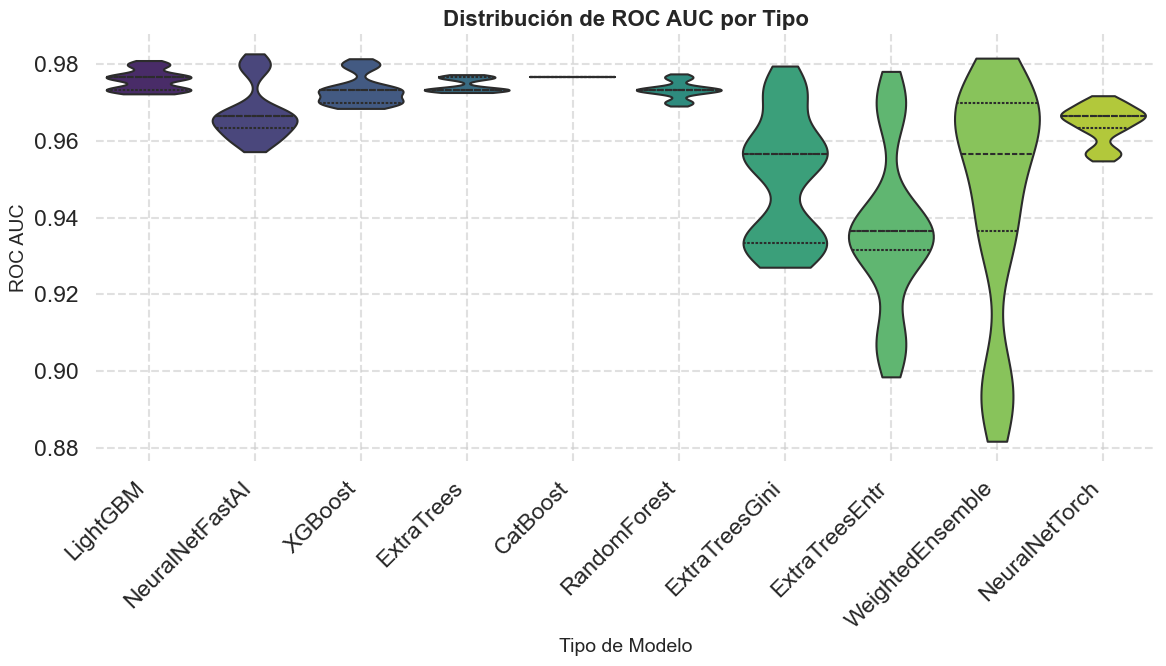

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo científico mejorado
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Configurar la figura
fig, ax = plt.subplots(figsize=(12, 7))

# Gráfico de violín con mejor visibilidad
sns.violinplot(
    data=top_df, x="type", y="roc_auc", 
    bw_adjust=0.5, cut=1, linewidth=1.5, 
    palette="viridis", inner="quartile"
)

# Personalización de etiquetas y título
ax.set_title("Distribución de ROC AUC por Tipo", fontsize=16, fontweight="bold")
ax.set_xlabel("Tipo de Modelo", fontsize=14)
ax.set_ylabel("ROC AUC", fontsize=14)

# Rotar etiquetas del eje X para evitar cortes
plt.xticks(rotation=45, ha="right")

# Mejorar la visibilidad de los ejes
sns.despine(left=True, bottom=True)
ax.grid(True, linestyle="--", alpha=0.6)

# Ajustar automáticamente los márgenes para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


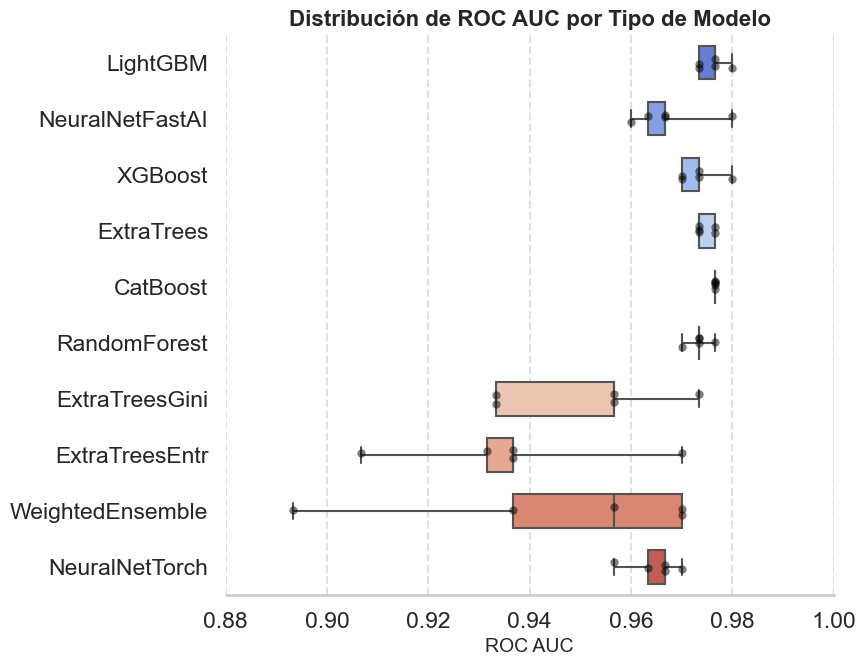

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo mejorado para visualización clara
sns.set_theme(style="whitegrid", context="talk", palette="deep")

# Inicializar la figura
fig, ax = plt.subplots(figsize=(9, 7))

# Gráfico de caja con mejor visibilidad
sns.boxplot(
    data=top_df, x="roc_auc", y="type", hue="type",
    whis=[0, 100], width=0.6, palette="coolwarm", 
    linewidth=1.5, fliersize=0  # Ocultar outliers ya que se mostrarán con stripplot
)

# Agregar puntos individuales para cada observación
sns.stripplot(
    data=top_df, x="roc_auc", y="type", size=6, 
    color="black", alpha=0.5, jitter=True  # Mejor dispersión y visibilidad
)

# Personalización del gráfico
ax.set_title("Distribución de ROC AUC por Tipo de Modelo", fontsize=16, fontweight="bold")
ax.set_xlabel("ROC AUC", fontsize=14)
ax.set_ylabel("")  # Se mantiene vacío para claridad
ax.xaxis.grid(True, linestyle="--", alpha=0.6)  # Líneas de cuadrícula más sutiles

# Ampliar el eje X hasta 1
ax.set_xlim(0.88, 1)

# Despinar para un diseño más limpio
sns.despine(trim=True, left=True)

# Ajustar automáticamente el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


C:\Users\jgala\AppData\Local\Temp\ipykernel_17800\2498427654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x="type", y=metric, ax=axes[row, col], palette="coolwarm", inner="quartile")
C:\Users\jgala\AppData\Local\Temp\ipykernel_17800\2498427654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x="type", y=metric, ax=axes[row, col], palette="coolwarm", inner="quartile")
C:\Users\jgala\AppData\Local\Temp\ipykernel_17800\2498427654.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top_df, x="typ

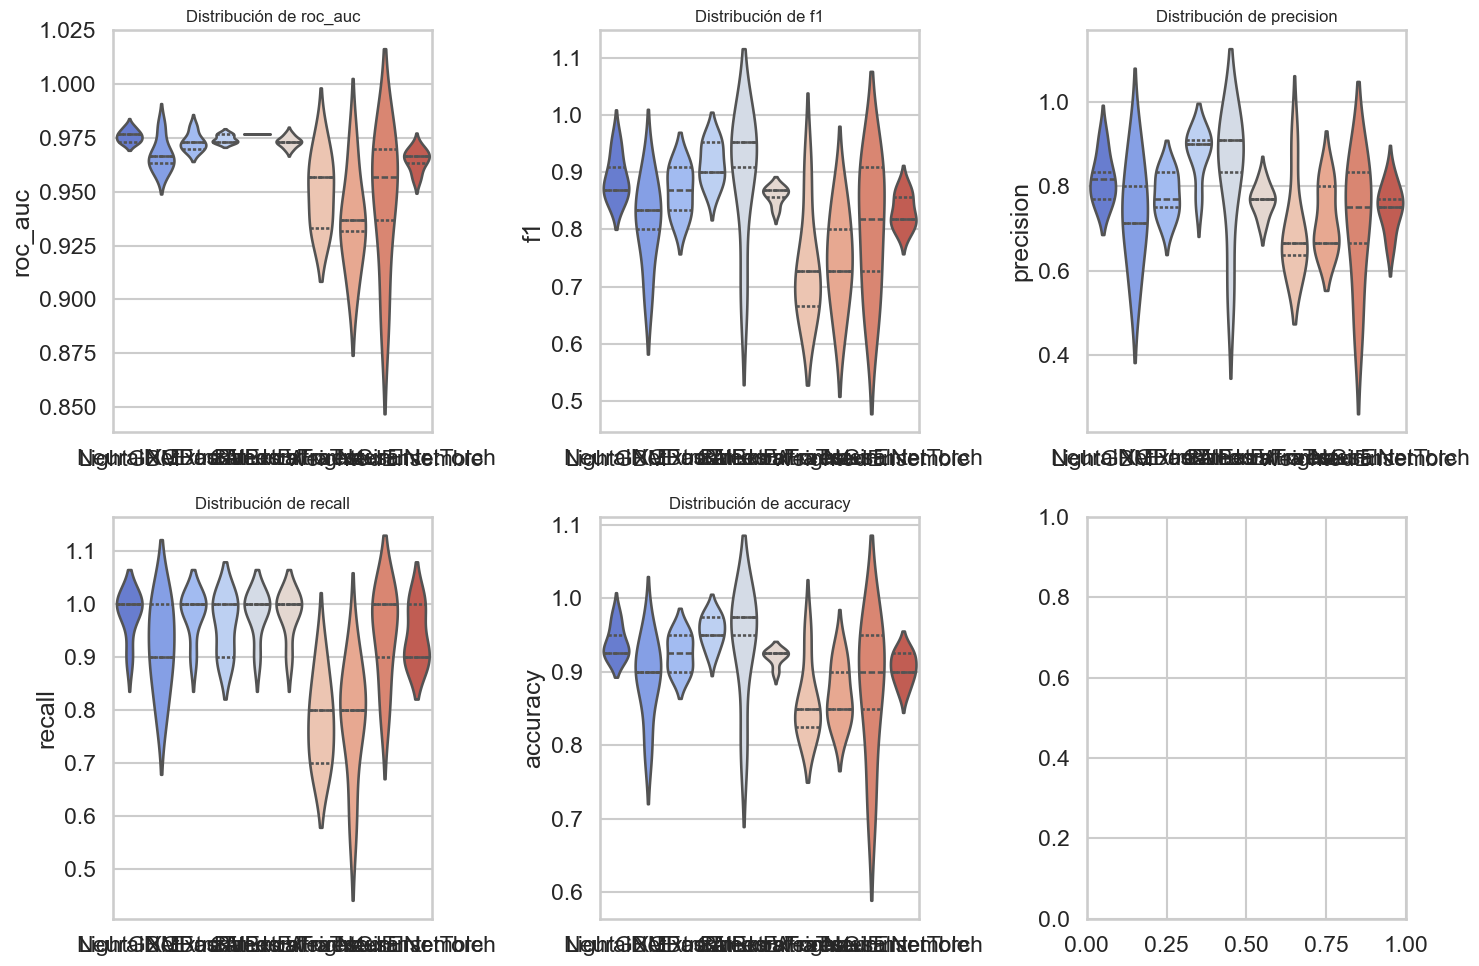

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

metrics = ["roc_auc", "f1", "precision", "recall", "accuracy"]
for i, metric in enumerate(metrics):
    row, col = divmod(i, 3)
    sns.violinplot(data=top_df, x="type", y=metric, ax=axes[row, col], palette="coolwarm", inner="quartile")
    axes[row, col].set_title(f"Distribución de {metric}", fontsize=12)
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel(metric)

plt.tight_layout()
plt.show()


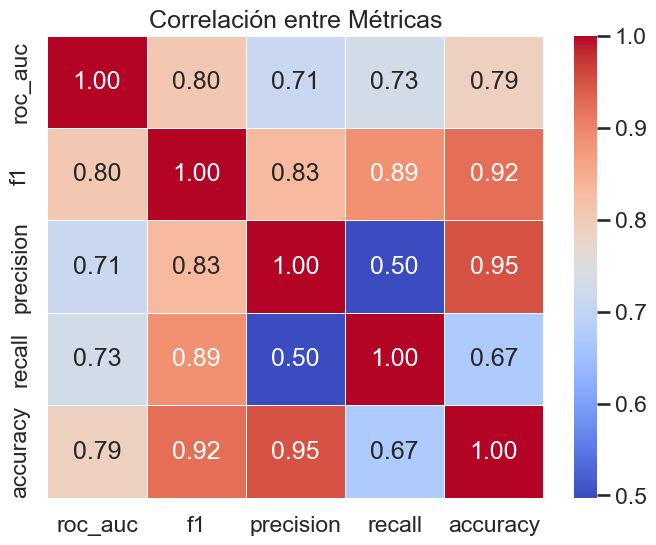

In [83]:
import numpy as np

# Crear matriz de correlación
corr = top_df[["roc_auc", "f1", "precision", "recall", "accuracy"]].corr()

# Graficar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlación entre Métricas")
plt.show()


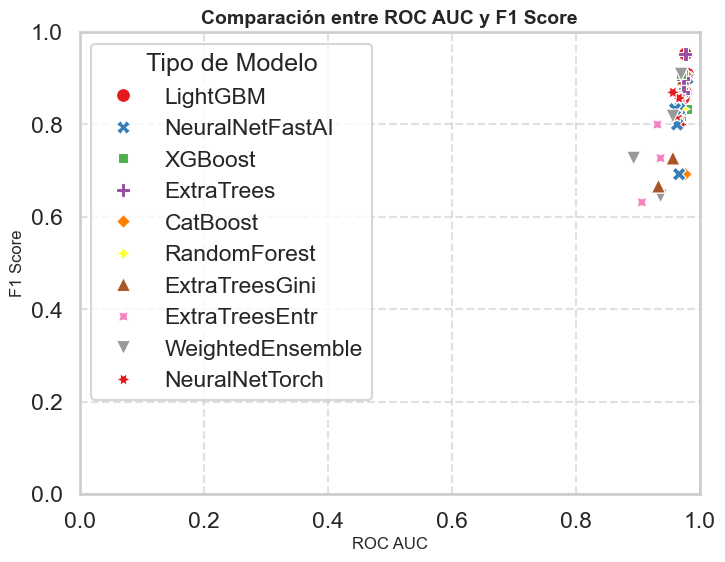

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=top_df, x="roc_auc", y="f1", hue="type", style="type", s=100, palette="Set1")

plt.title("Comparación entre ROC AUC y F1 Score", fontsize=14, fontweight="bold")
plt.xlabel("ROC AUC", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Tipo de Modelo")
plt.show()
